## Final Project Submission

Please fill out:
* Student name: PAUL GITONGA NJOKI
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


KING COUNTY HOUSING PROJECT

Overview

King County is in the state of Washington in the United States. It is Washington's most populous county and the 13th most populous in the United States. Seattle, the state's most populated city, serves as the county seat.# Your code here - remember to use markdown cells for comments as well!

BUSINESS UNDERSTANDING

A Seattle real estate agent wants to discover which elements have a substantial impact on the price of a house in King County. This will help in strategizing on the best criterion to use to maximise profit. The company has tasked me with developing a model that will be used to estimate property prices in King County and obtaining substantial advice on activities that they should take to ensure the business's success.

BUSINESS OBJECTIVES

* To understand factors that are most predictive of price.
* Which house features will give the best deals.
* Obtain a model that will be of use when predicting the price of a property.
This project will utilize regression to build a model predicting housing prices in King County, Seattle. The King County data was provided which contains information on houses sold between May 2014 and May 2015.

Data Understanding

In [3]:
#Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy import stats
import datetime

In [4]:
#reading data
df = pd.read_csv ("King-County-Housing-Project\data\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Obtaining Data Frame columns
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
#obtaining data frame columns and rows
df.shape

(21597, 21)

The dataset contains 21597 items and 20 features of house sales information in King County

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#Checking Nan Values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#houses with unique floor values
df['floors'].value_counts().to_frame()

,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


In [11]:
#houses without basement

(df.sqft_basement == '0.0').sum()

12826

In [12]:
#houses on a waterfront 

(df.waterfront == 'YES').sum()

146

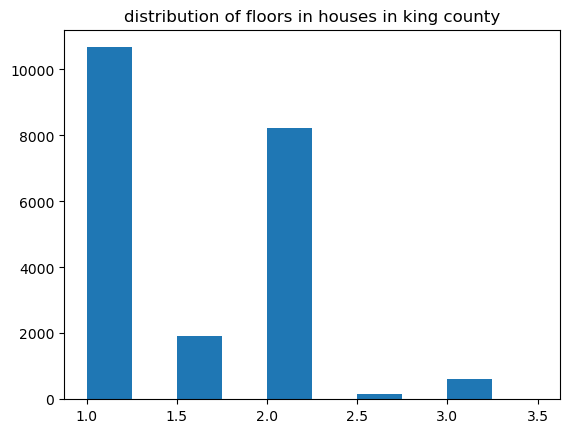

In [13]:
#distribution floors in a house in the dataset

plt.hist(x = df['floors'])
plt.title("distribution of floors in houses in king county")
plt.show()

Majority of the houses in King County have only one floor.

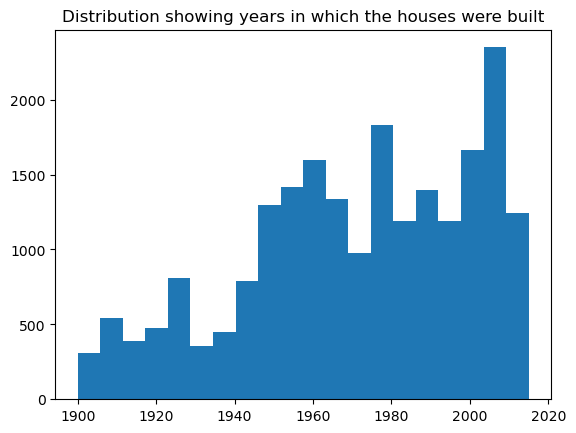

In [14]:
#distribution showing years in which king's county houses were built according to the data

plt.hist(x = df['yr_built'], bins = 20)
plt.title("Distribution showing years in which the houses were built")
plt.show()

Data description report

King County data contains 21597 records with 20 features.

We see that the data contains some null values in waterfront, view and year renovated.

categorical data include waterfront, condition, grade and view.

This data set is on house sales prices for King County, covering homes sold between May 2014 to May 2015

Most houses have 1 floor

The data contains houses built between 1900 and 2015.

The average grade of the houses is 7, meaning most houses sold are above average grade.

The maximum number of floors of houses you can find in King County is 3.5.

### DATA PREPARATION

In [15]:
#dropping unnessary columns 

df.drop(['zipcode','date', 'view', 'yr_renovated', 'sqft_basement', 'yr_built', 'lat', 'long'], axis=1, inplace=True)


In [16]:
df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
#calculating the correlation between the features and our target variable price

corr = df.corr()
corr.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_22056\3097073917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(10, 10)

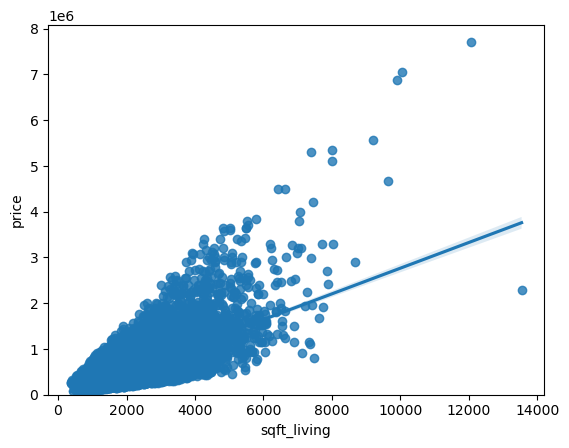

In [27]:

def plot(x, y, data):
    sns.regplot(x=x, y=y, data=data)
    plt.ylim(0,)
    plt.show()

# Call the plot function with the specified variables and DataFrame
plot(x="sqft_living", y="price", data=df)

plt.show()



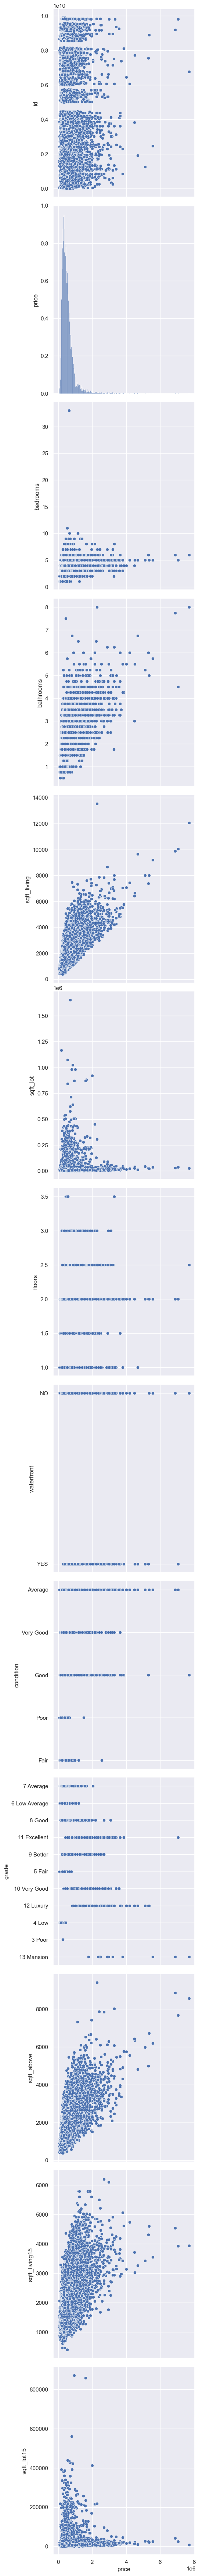

In [28]:
#scatterplot showing if there is a linear relationship between features and price 
sns.set()
cols = df.columns
sns.pairplot(data=df, x_vars=["price"], y_vars=cols, height = 5.5)
plt.show();

In [29]:
#removing outliers in our target variable price

def outlier(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [30]:
outlier(df['price'])

(-162500.0, 1129500.0)

In [31]:
lowerbound,upperbound = outlier(df.price)

In [32]:
df['price'].drop(df[ (df.price > upperbound) | (df.price < lowerbound) ].index , inplace=True)

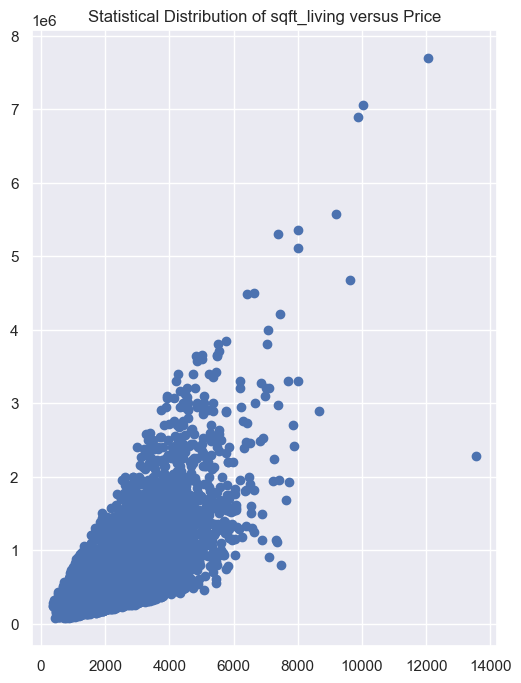

In [33]:
#relationship between price and sqft_living after removing outliers

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_living'], y=df['price'] )
plt.title('Statistical Distribution of sqft_living versus Price')
plt.show();

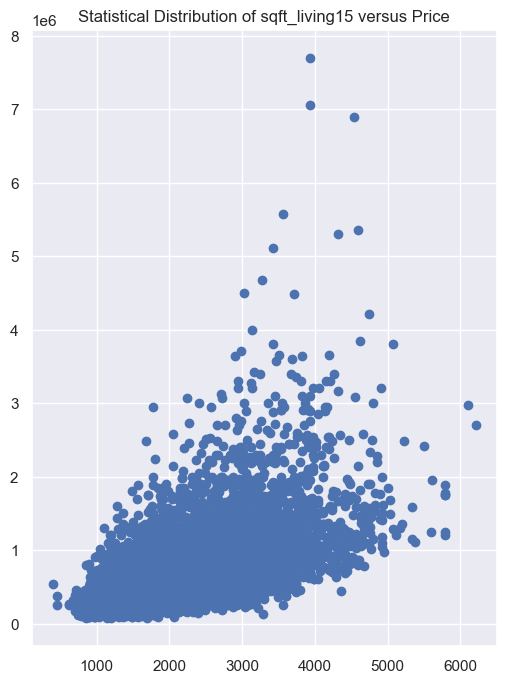

In [36]:
# relationship between price and sqft_living15 after removing outliers

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_living15'], y=df['price'] )
plt.title('Statistical Distribution of sqft_living15 versus Price')
plt.show();

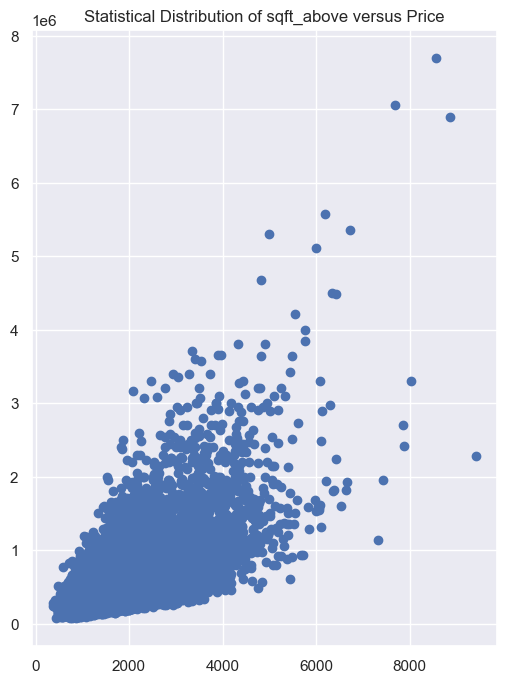

In [35]:
#relationship between price and sqft_living

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_above'], y=df['price'] )
plt.title('Statistical Distribution of sqft_above versus Price')
plt.show();

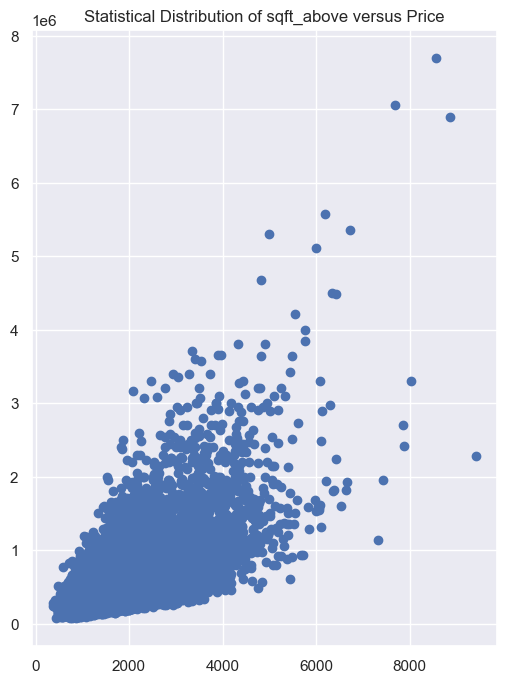

In [38]:
#relationship between price and sqft_living

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_above'], y=df['price'] )
plt.title('Statistical Distribution of sqft_above versus Price')
plt.show();

In [39]:
#dealing with missing values
#taking waterfront column with data that is Missing

df = df[df['waterfront'].notna()]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,3890,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,1180,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,1020,2007


In [41]:
#checking if all Missing Values are dealt with
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
df.corr()['price'].drop('price')

C:\Users\hp\AppData\Local\Temp\ipykernel_22056\1006620443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].drop('price')


id              -0.017439
bedrooms         0.309651
bathrooms        0.527350
sqft_living      0.704652
sqft_lot         0.087005
floors           0.258277
sqft_above       0.609168
sqft_living15    0.582167
sqft_lot15       0.081243
Name: price, dtype: float64

In [43]:
df.condition

1          Average
2          Average
3        Very Good
4          Average
5          Average
           ...    
21591      Average
21592      Average
21593      Average
21594      Average
21596      Average
Name: condition, Length: 19221, dtype: object

we have sqft_living, sqft_above, sqft_living15, bathrooms

In [48]:
# saving  cleaned dataset to csv

df.to_csv('Kchouse_cleaned.csv', index=False)

Data Preparation Report


We first dropped the columns that won't be needed for the analysis.

Our target variable is price which will be used in creating a model.

Removed outliers in our independent variables.

Examining the distributions of price it contained outliers which were removed and performed a log transformation.

Missing values were removed by dropping rows with the nulls.

In correlation between price and other features, we have sqft_living, sqft_above, sqft_living15 and bathrooms having high positive correlation. This will be used in creating our model.

we will perform one-hot encoding for the categorical variables waterfront, grade, condition so as to be used in creating a model.

Modelling

Linear Regression

in this stage we will use linear regression analysis to predict house price based on various features

In [60]:
X = df[['sqft_living']]
y = df['price']

#creating a linear model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:01:07   Log-Likelihood:            -2.6723e+05
No. Observations:               19221   AIC:                         5.345e+05
Df Residuals:                   19219   BIC:                         5.345e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.045e+04   4703.746    -10.726      

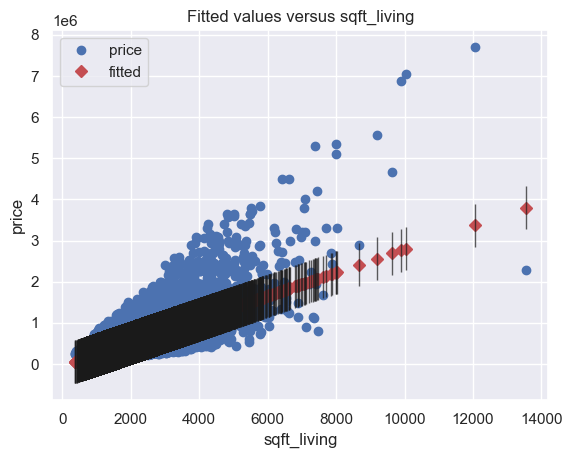

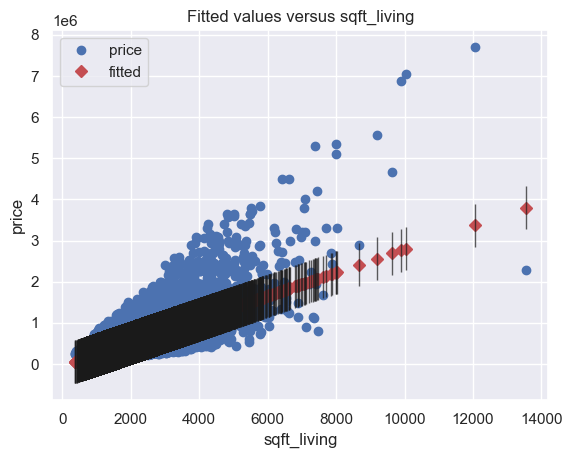

In [61]:
# Model visualization
sm.graphics.plot_fit(results, "sqft_living")

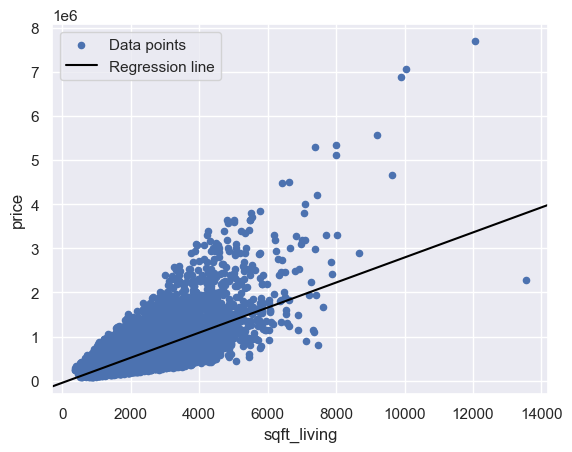

In [62]:
#regression line:

fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax, color="black")
ax.legend();

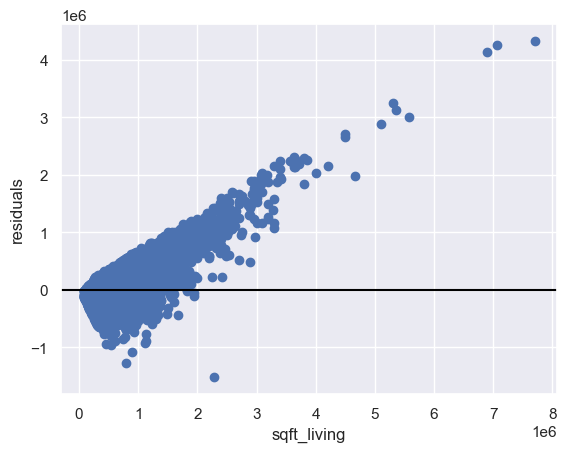

In [63]:
#residuals:

fig, ax = plt.subplots()

ax.scatter(df["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

linear regression model interpretation

from about our model can be defined as:

       price = -5.045e+04 + 284.3280sqft_living

Here, 49.7% variation in price can be explained by the Square footage of living space in the home

An rsquared of 49.7% is a low variation and indicates the Square footage of living space in the home is not explaining much variation of the price.

we will solve this by doing a multiple linear regression, adding more variables to our model to increase variability.

Multiple linear regression

Independent variables used: sqft_living, sqft_above, bedrooms, condition, grade

Starting with numerical values:

In [66]:
X = df[['sqft_living', 'sqft_living15']]
y = df['price']

In [68]:
#forming a model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     9698.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:07:21   Log-Likelihood:            -2.6712e+05
No. Observations:               19221   AIC:                         5.342e+05
Df Residuals:                   19218   BIC:                         5.343e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.021e+05   5818.438    -17.541

Interpretation of our  Multiple Linear Regression Model


The model built is: price = -1.021e+05 + 249.0055sqft_living + 62.9802sqft_living15

The model explains 50.2 % variation in price.

The model coefficients (const, sqft_living, and sqft_living15) are all statistically significant, with t-statistic p-values well below 0.05

For each increase of squarefoot, we see an associated increase in price of about 249.0055.

This is a little bit smaller of a increase than we saw with the simple model, but not a big change.

For each increase of 1 in sqft_living15, we see an associated increase in price of about 62.9802.

All of the p-values round to 0.


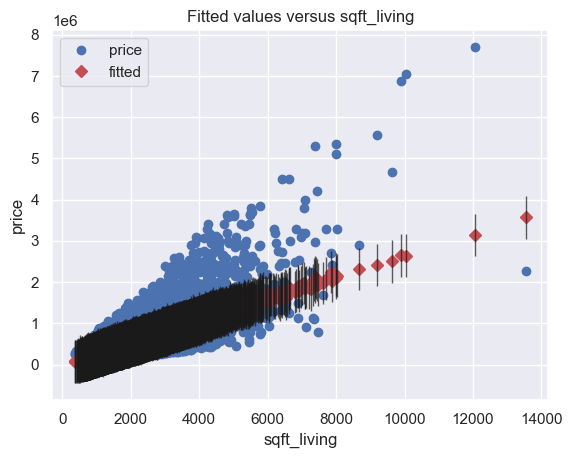

In [71]:
#ploting the fit for the sqft_living predictor

sm.graphics.plot_fit(results, "sqft_living")
plt.show()

In [72]:
###This shows true(blue) and predicted(red) values with Square footage of living space in the home as the predictor.

eval_env: 1
eval_env: 1


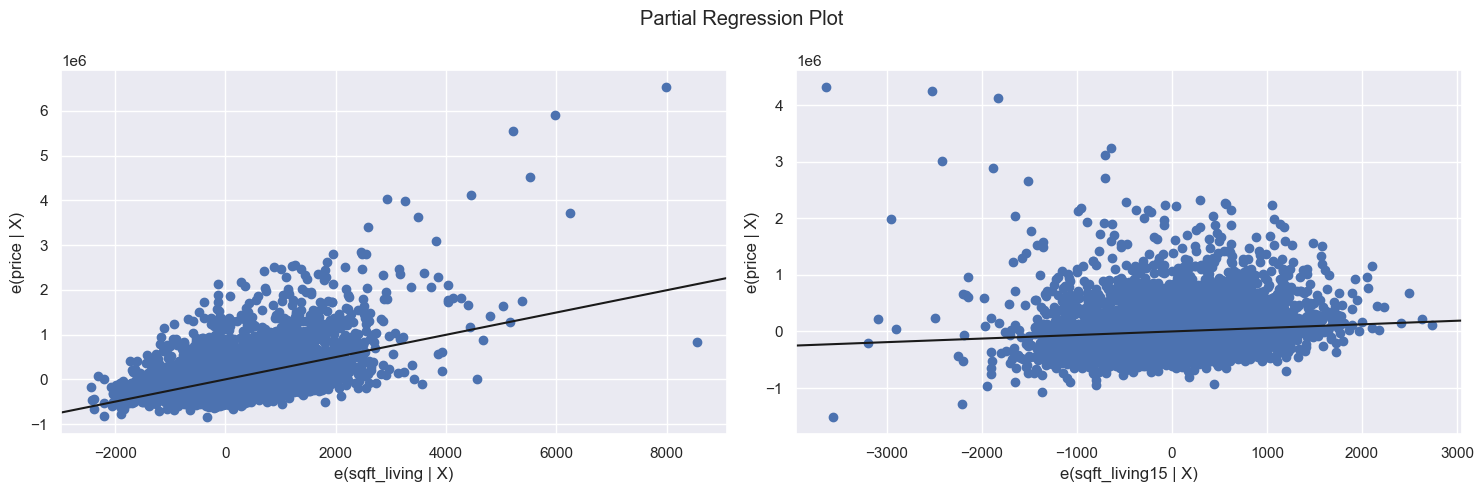

In [73]:
#Plot for Partial Regression

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(results, exog_idx=["sqft_living", "sqft_living15"], fig=fig)
plt.tight_layout()
plt.show()

The partial regression plot for sqft_living is showing the marginal contribution of sft_living compared to a model with just sqft_living15. Both predictors should be included in the model.

In [74]:
# using our fitted model to generate predictions for y(price)

y_pred = results.predict(sm.add_constant(X)) 
y_pred.head()

1    6.443209e+05
2    2.609807e+05
3    4.716441e+05
4    4.296338e+05
5    1.547336e+06
dtype: float64

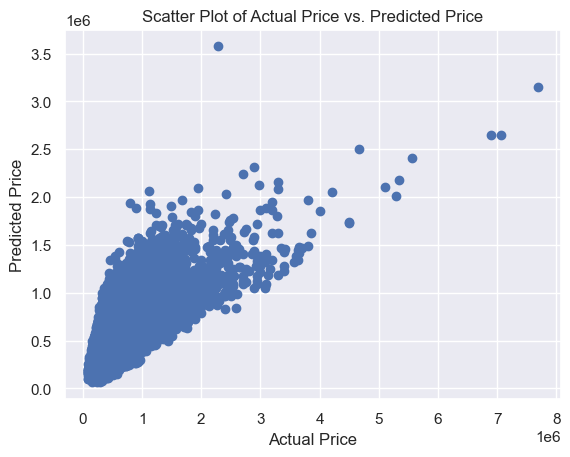

In [76]:
plt.scatter(x=df.price, y=y_pred)
sns.set_style("darkgrid")
plt.title("Scatter Plot of Actual Price vs. Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Multiple Linear Regression including categorical variables

For condition and grade we perform one-hot encoding to convert them to numerical counterparts.

In [77]:
y = df["price"]
X = df[['sqft_living', 'sqft_above', 'grade']]
X = pd.get_dummies(X, columns=['grade'], drop_first=True) 

X

,sqft_living,sqft_above,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,2570,2170,0,0,0,0,0,0,0,1,0,0
2,770,770,0,0,0,0,0,0,1,0,0,0
3,1960,1050,0,0,0,0,0,0,0,1,0,0
4,1680,1680,0,0,0,0,0,0,0,0,1,0
5,5420,3890,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,1310,1180,0,0,0,0,0,0,0,0,1,0
21592,1530,1530,0,0,0,0,0,0,0,0,1,0
21593,2310,2310,0,0,0,0,0,0,0,0,1,0
21594,1020,1020,0,0,0,0,0,0,0,1,0,0


we drop the first column when performing one-hot coding to avoid dummy variable trap.

In [78]:
# creating a multiple linear regression model that includes categorical variables

model = sm.OLS(y, sm.add_constant(X))
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2341.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:17:09   Log-Likelihood:            -2.6517e+05
No. Observations:               19221   AIC:                         5.304e+05
Df Residuals:                   19208   BIC:                         5.305e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.954e+05   1

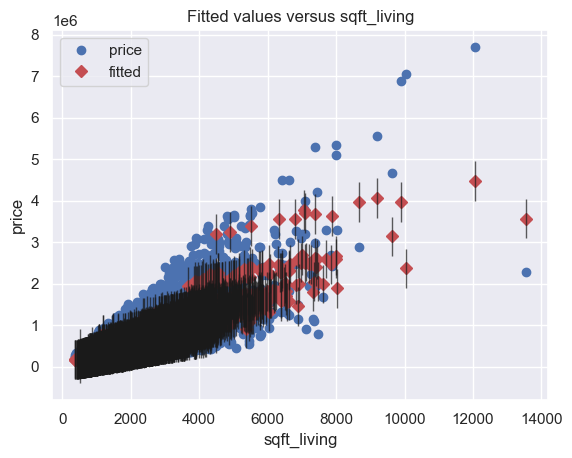

In [79]:
#model_fit

sm.graphics.plot_fit(results1, "sqft_living")
plt.show()

Visualizing true (blue) vs. predicted (red) values, with the predictor, sqft_living along the x-axis.

interpretation:

The model explains 59.4% variation in price.

All of the p-values round to 0

when all predictors are 0, the price value would be about 5.954e+05

with each increase in 1 sqft_living, we see an associated price increase of 220.1353 and with each inctrease in 1 sqft_above, we see an associated price decrease of -93.6898

For a house with an overall grade of 11(Excellent) we see an increase of 2.844e+05 in price of the house, an increase of 8.757e+05 in house price for grade 12(luxury) and 2.036e+06 on grade_13 Mansion.

for the company to maximize on profit, the houses should be of a high overall grade of the house. Related to the construction and design of the house.

In [88]:
# using our fitted model to generate predictions for y(price)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
model = sm.OLS(y, X)
results = model.fit()
# Predict the price of the houses
y_pred = results.predict(sm.add_constant(X))

# Print the head of the predicted values
y_pred.head()

1    5.252083e+05
2    2.374213e+05
3    4.958584e+05
4    4.483307e+05
5    1.708410e+06
dtype: float64